## Ejercicio 1

#### a. ¿En qué se diferencia el modelo macroscópico del modelo microscópico en este escenario?

El modelo macroscópico considera la varilla como un todo y observa la variación de temperatura a lo largo de toda la varilla. Se concentra en obtener una descripción general de la distribución de temperatura.
El modelo microscópico se centra en una región específica (por ejemplo, donde los dos materiales se encuentran) y calcula la distribución de temperatura con más detalle en esa región, teniendo en cuenta las características de los materiales individuales.

#### b. ¿Cuáles son las condiciones de contorno del modelo microscópico y cómo las determina el modelo macroscópico?
Las condiciones de contorno para el modelo microscópico se obtendrán del modelo macroscópico. Es decir, la temperatura en los extremos de la región de interés (calculada por el modelo macroscópico) servirá como condiciones de contorno para el modelo microscópico.

#### c. ¿Cómo adaptaría este modelo multiescala si la varilla estuviera compuesta por más de dos materiales diferentes?
Si la varilla estuviera compuesta por más de dos materiales, deberíamos repetir el procedimiento microscópico para cada interfaz entre materiales diferentes. Cada región de interfaz tendría sus propias condiciones de contorno proporcionadas por el modelo macroscópico.

##### Params

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
L = 1.0
dt = 0.0001
dx = 0.01
k1 = 0.2  # conductividad del material 1
k2 = 0.5  # conductividad del material 2
alpha1 = k1 * dt / dx**2
alpha2 = k2 * dt / dx**2
T0 = 0
Tf = 100
time_steps = 100
x = np.arange(0, L + dx, dx)
temp_macro = np.full(x.shape, T0)
temp_macro[-1] = Tf 


##### Modelo Macroscopico

In [11]:

# 1. Modelo macroscópico
def modelo_macroscopico(temp, alpha1, alpha2, L):
    for i in range(1, len(temp) - 1):
        if x[i] < L/2:
            temp[i] = temp[i] + alpha1 * (temp[i-1] - 2*temp[i] + temp[i+1])
        else:
            temp[i] = temp[i] + alpha2 * (temp[i-1] - 2*temp[i] + temp[i+1])
    return temp


##### Modelo Microscopico

In [12]:
# 2. Modelo microscópico
def modelo_microscopico(temp, alpha1, alpha2, L):
    # Para simplificar, modelaremos la interfaz entre los dos materiales.
    # Estos índices determinan el inicio y final de esta región.
    start_idx = int(L/2/dx) - 5
    end_idx = int(L/2/dx) + 5
    
    for i in range(start_idx, end_idx):
        if x[i] < L/2:
            temp[i] = temp[i] + alpha1 * (temp[i-1] - 2*temp[i] + temp[i+1])
        else:
            temp[i] = temp[i] + alpha2 * (temp[i-1] - 2*temp[i] + temp[i+1])
    
    return temp

##### Combinacion

In [13]:
# 3. Combinar modelos
for t in range(time_steps):
    temp_macro = modelo_macroscopico(temp_macro, alpha1, alpha2, L)
    temp_macro = modelo_microscopico(temp_macro, alpha1, alpha2, L)

##### Combinacion

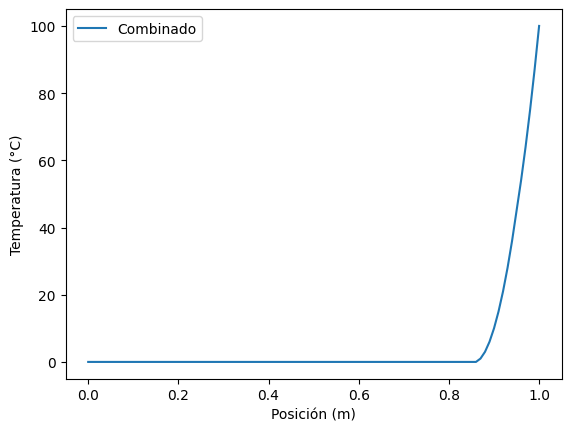

In [14]:
# 4. Visualizar
plt.plot(x, temp_macro, label='Combinado')
plt.xlabel('Posición (m)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()